In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
import string
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

In [9]:
pd.set_option('display.max_colwidth',-1) 

<ipython-input-9-bac2f3454903>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [10]:
df_train= pd.read_csv(r'C:\Users\gauri\Documents\natural\nlp-getting-started\train.csv')# loading train data

In [11]:
df_test= pd.read_csv(r'C:\Users\gauri\Documents\natural\nlp-getting-started\test.csv') #loading test data

In [12]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


#checking for class imbalances ,it looks like the data  well balanced, and accuracy classification models.

In [13]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

# using  some preprocessing steps to clean the text column,remove the stop words ,punctuations etc

In [14]:
#using  some preprocessing steps to clean the text column,remove the stop words ,punctuations etc

wordnet=WordNetLemmatizer()

#sentences = nltk.sent_tokenize(paragraph)

def clean(doc) :
    sentences = nltk.sent_tokenize(doc)
    
    for i in range(len(sentences)):
        tweets = re.sub('[^a-zA-Z]', ' ', sentences[i])
        tweets =  tweets .lower()
        tweets  =  tweets .split()
        tweets = [wordnet.lemmatize(word) for word in  tweets if not word in set(stopwords.words('english'))]
        tweets = ' '.join( tweets )
        
        
        
    return  tweets 

In [15]:
df_train['text_cleaned'] = df_train['text'].apply(clean)

In [17]:
df_test['text_cleaned'] = df_test['text'].apply(clean)

In [16]:
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: re.sub(r'https?://\S+', '',x))

In [18]:
df_test['text_cleaned'] = df_test['text_cleaned'].apply(lambda x: re.sub(r'https?://\S+', '',x))

In [19]:
df_train.head()

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school


In [14]:
df_test.head()

,id,keyword,location,text,text_cleaned
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",heard earthquake different city stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose fleeing across street cannot save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


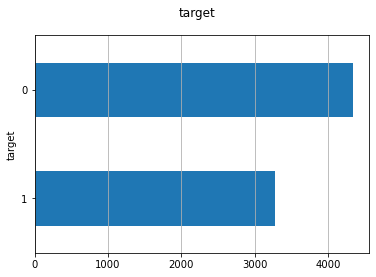

In [76]:
import matplotlib.pyplot as plt
x = "target"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
df_train[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

The dataset is balanced

In [20]:
import spacy

In [1]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [21]:
ner = spacy.load("en_core_web_lg")
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token.text, token.pos_) for token in ner(string) if token.pos_=='PROPN'])

[('Reason', 'PROPN'), ('ALLAH', 'PROPN')]


In [22]:

def propn_count(text, model=ner):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_train['propn_count'] = df_train['text_cleaned'].apply(propn_count)


In [23]:
def propn_count(text, model=ner):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_test['propn_count'] = df_test['text_cleaned'].apply(propn_count)

In [24]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags
df_test['hash_count'] = df_test['text_cleaned'].apply(hash_count)


In [25]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags
df_train['hash_count'] = df_train['text_cleaned'].apply(hash_count)


# word cloud created for disaster tweets ,this helps us to see the difference between the disaster and non disaster tweets

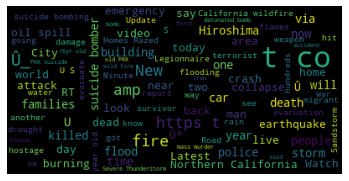

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

#y = "1"
#corpus = df_train[df_train["target"]==y]["text_cleaned"]
corpus = ' '.join(df_train[df_train['target'] ==1].text) #raw
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

#y = "1"
#corpus = df_train[df_train["target"]==y]["text_cleaned"]
corpus = ' '.join(df_train[df_train['target'] ==1].text_cleaned) #cleaned
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

# BAG OF WORDS and TF_IDF

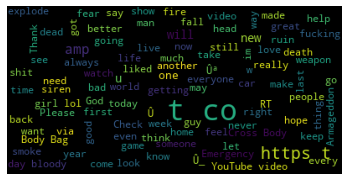

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

corpus = ' '.join(df_train[df_train['target'] ==0].text)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [26]:
df_train['word_count'] = df_train["text_cleaned"].apply(lambda x: len(str(x).split(" ")))
df_train['char_count'] = df_train["text_cleaned"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_train['sentence_count'] = df_train["text_cleaned"].apply(lambda x: len(str(x).split(".")))
df_train['avg_word_length'] = df_train['char_count'] / df_train['word_count']
df_train['avg_sentence_lenght'] = df_train['word_count'] / df_train['sentence_count']
df_train.head()

,id,keyword,location,text,target,text_cleaned,propn_count,hash_count,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,2,0,7,36,1,5.142857,7.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada,1,0,1,6,1,6.000000,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected,0,0,5,35,1,7.000000,5.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,1,0,6,46,1,7.666667,6.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,2,0,9,46,1,5.111111,9.0


In [27]:
df_test['word_count'] = df_test["text_cleaned"].apply(lambda x: len(str(x).split(" ")))
df_test['char_count'] = df_test["text_cleaned"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_test['sentence_count'] = df_test["text_cleaned"].apply(lambda x: len(str(x).split(".")))
df_test['avg_word_length'] = df_test['char_count'] / df_test['word_count']
df_test['avg_sentence_lenght'] = df_test['word_count'] / df_test['sentence_count']
df_test.head()

,id,keyword,location,text,text_cleaned,propn_count,hash_count,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash,0,0,4,24,1,6.000000,4.0
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",heard earthquake different city stay safe everyone,0,0,7,44,1,6.285714,7.0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose fleeing across street cannot save,0,0,10,52,1,5.200000,10.0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,spokane wildfire,1,0,2,15,1,7.500000,2.0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,4,0,5,30,1,6.000000,5.0


In [28]:
features = ['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 
            'propn_count','hash_count' ]

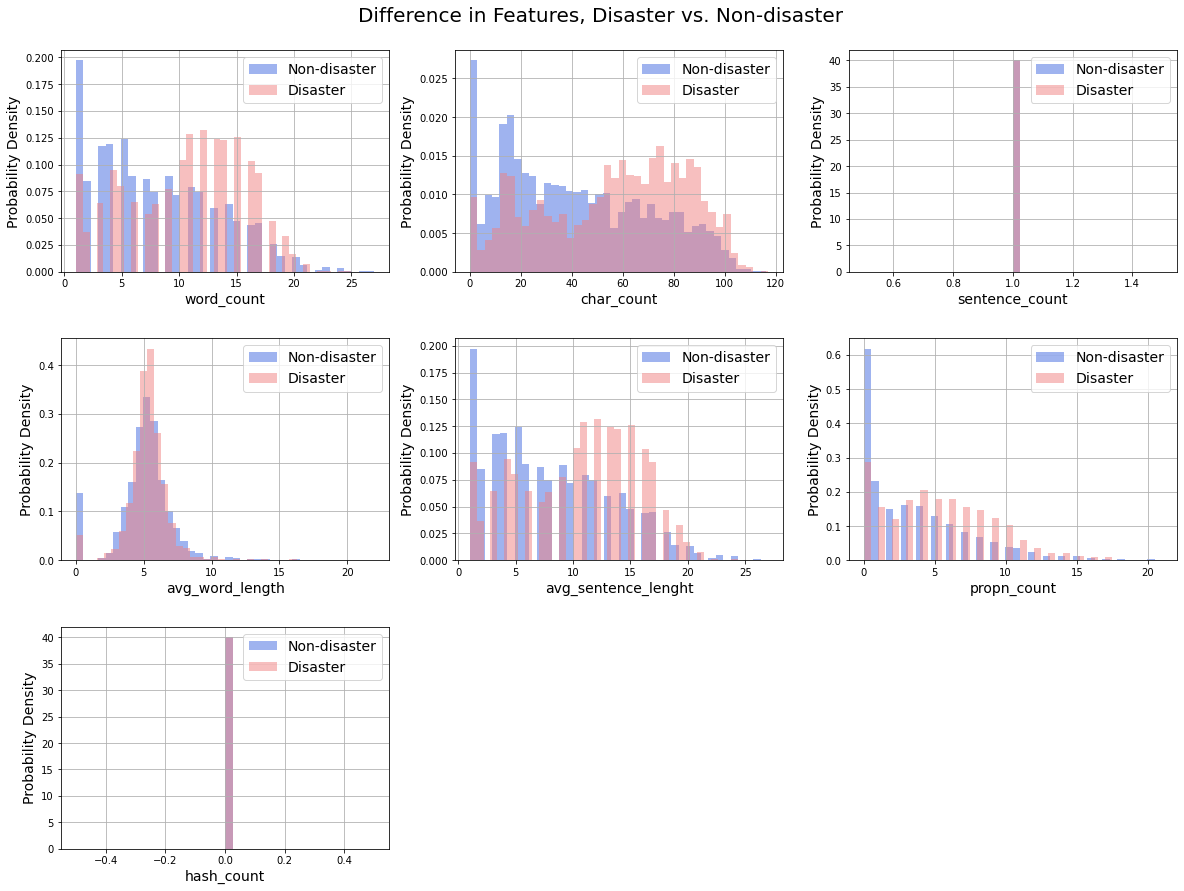

In [29]:
# create the figure
fig = plt.figure(figsize=(20, 20))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    ax =df_train[df_train['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = df_train[df_train['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()


#The http characters in the regex match the literal characters.

\S matches any character that is not a whitespace character. Notice that the S is uppercase.

The plus + matches the preceding character (any non-whitespace character) 1 or more times.

#Feature Engineering

In [267]:
y_train.shape

(7613,)

In [18]:
y_train = df_train['target']

In [ ]:
#using scikit learn count vectorizer for bag of words model and tfidfvectorizer for term_frequency -inverse term frequency

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
cv = CountVectorizer()

In [32]:
#Fit the training data and then return the matrix
X_train_bow = cv.fit_transform(df_train['text_cleaned']).toarray()

In [49]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:

X_bow_df = pd.DataFrame(X_train_bow)

In [34]:
X_bow_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17586,17587,17588,17589,17590,17591,17592,17593,17594,17595
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_train.drop('bow',axis=1)

,id,keyword,location,text,target,text_cleaned,propn_count,hash_count,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,2,0,7,36,1,5.142857,7.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada,1,0,1,6,1,6.000000,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected,0,0,5,35,1,7.000000,5.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,1,0,6,46,1,7.666667,6.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,2,0,9,46,1,5.111111,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,two giant crane holding bridge collapse nearby home http co stfmbbzfb,4,0,11,59,1,5.363636,11.0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,troubling,0,0,1,9,1,9.000000,1.0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,http co zdtoyd ebj,4,0,4,15,1,3.750000,4.0
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,e bike rider suffered serious non life threatening injury,0,0,9,49,1,5.444444,9.0


In [55]:
X_features_bow = pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_bow_df], axis=1)

# check the shape
X_features_bow.shape

(7613, 17601)

In [56]:
y_features_bow = df_train['target']

In [57]:
X_training_bow, Xbow_val, ybow_train, ybow_val = train_test_split(X_features_bow, y_features_bow, shuffle = True, random_state = 123)

In [58]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_training_bow, ybow_train)
predictions_nb_bow= naive_bayes.predict(Xbow_val)
predictions_nb_bow

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [60]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_training_bow, ybow_train)
predictions_lr_bow = model.predict(Xbow_val)
predictions_lr_bow 

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [62]:
#Accuracy for naive bayes with Bag of words
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(ybow_val, predictions_nb_bow  , pos_label=1)
acc_nb_bow= accuracy_score(ybow_val,predictions_nb_bow )
acc_nb_bow

0.7752100840336135

In [63]:
#Accuracy for logistic regression with Bag of words
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(ybow_val, predictions_lr_bow , pos_label=1)
acc_nb_lr= accuracy_score(ybow_val,predictions_lr_bow  )
acc_nb_lr

0.7710084033613446

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1097
           1       0.79      0.64      0.71       807

    accuracy                           0.78      1904
   macro avg       0.78      0.76      0.76      1904
weighted avg       0.78      0.78      0.77      1904



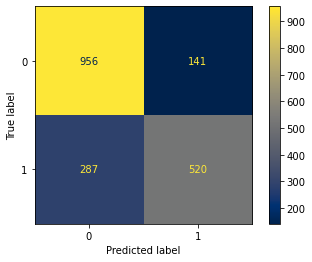

In [72]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(naive_bayes, Xbow_val, ybow_val, cmap="cividis")
print(classification_report(ybow_val, predictions_nb_bow))

In [73]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(df_train['text_cleaned']).toarray()

In [74]:
X_tf_idf = pd.DataFrame(X_train_tfidf)

In [75]:
X_features_tfidf = pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_tf_idf ], axis=1)

# check the shape
X_features_tfidf.shape

(7613, 57573)

In [98]:
y_features_tfidf = df_train['target']

In [94]:
y_features_tfidf.shape

(7613,)

In [97]:
ytrain_fidf.shape

(1904, 57573)

In [99]:
xtrain_tfidf,xtrain_tfidfval,ytrain_fidf,ytfidf_val = train_test_split(X_features_tfidf, y_features_tfidf, shuffle = True, random_state = 123)

In [100]:
from sklearn.naive_bayes import MultinomialNB
naive_bayestfidf = MultinomialNB()
naive_bayestfidf.fit(xtrain_tfidf, ytrain_fidf)
predictions_nb_tfidf= naive_bayestfidf.predict(xtrain_tfidfval)
predictions_nb_tfidf

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [101]:
#Accuracy for naive bayes with TF_IDF
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(ytfidf_val , predictions_nb_tfidf  , pos_label=1)
acc_nb_tfidf= accuracy_score(ytfidf_val,predictions_nb_tfidf)
acc_nb_tfidf

0.694327731092437

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1097
           1       0.63      0.68      0.65       807

    accuracy                           0.69      1904
   macro avg       0.69      0.69      0.69      1904
weighted avg       0.70      0.69      0.70      1904



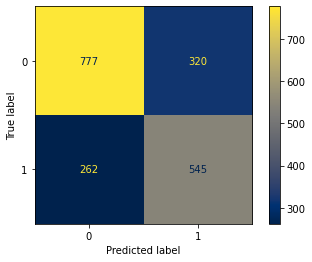

In [199]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(naive_bayestfidf, xtrain_tfidfval, ytfidf_val, cmap="cividis")
print(classification_report(ytfidf_val ,predictions_nb_tfidf))

In [106]:
#Accuracy for Logistic Regression  with TF_IDF
from sklearn.linear_model import LogisticRegression

modeltfidf = LogisticRegression()
modeltfidf.fit(xtrain_tfidf, ytrain_fidf)
predictions_lr_tfidf= modeltfidf.predict(xtrain_tfidfval)
predictions_lr_tfidf

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [107]:
#Accuracy for naive bayes with TF_IDF
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(ytfidf_val, predictions_lr_tfidf , pos_label=1)
acc_lr_tfidf= accuracy_score(ytfidf_val,predictions_lr_tfidf)
acc_lr_tfidf

0.7573529411764706

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(naive_bayes, Xbow_val, ytfidf_val, cmap="cividis")
print(classification_report(ybow_val, predictions_nb_bow))

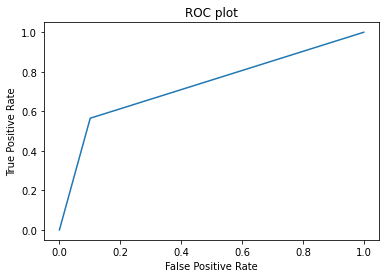

In [108]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(ytfidf_val, predictions_lr_tfidf , pos_label=1)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC plot")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
df_train['tfidf'] = tfidf

In [113]:
import numpy as np
tfidf= np.array(X_train_tfidf).tolist() #adding back to data frmae for visualisation later while comparing with other embedding

SGDClassifier

In [116]:
import tensorflow_hub as hub

In [3]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [127]:
sgdc = SGDClassifier()

In [129]:
from keras.models import Sequential
from keras.layers import Embedding

In [132]:
texts = df_train["text_cleaned"].values
labels = df_train["target"].values

In [155]:
s= sgdc.fit(data,y_train)

In [4]:
#using pregenerated embeddings

In [139]:

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [ ]:
# Creating the padded matrices
X_train_NN = tokenizer.texts_to_sequences(X_train)
X_train_NN = pad_sequences(string_list, maxlen=m27)

In [159]:
embeddings

<tf.Tensor: shape=(7613, 512), dtype=float32, numpy=
array([[ 0.04173129,  0.01469113,  0.01474294, ...,  0.0411029 ,
         0.01181808, -0.05976298],
       [-0.04819873,  0.03537264,  0.04102627, ..., -0.01832361,
         0.00689633, -0.03856334],
       [ 0.01636763,  0.11777475, -0.04635794, ..., -0.06428417,
         0.05406549, -0.05619039],
       ...,
       [-0.06729391, -0.01303099, -0.00792565, ...,  0.03055793,
        -0.00033558,  0.02292108],
       [ 0.04344312, -0.03780692,  0.08376308, ..., -0.04751174,
        -0.10073172,  0.05825363],
       [ 0.00454183, -0.04868893, -0.04563379, ...,  0.02823377,
         0.0071596 , -0.00343935]], dtype=float32)>

In [160]:
data.shape

(7613, 27)

In [156]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=27
embedded_docs=pad_sequences(embeddings,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [133]:
# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in texts])

In [134]:
max_len

27

In [157]:
embedded_docs.shape

(7613, 27)

In [158]:
embedded_docs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
#generate embeddings
embeddings = embed(df_train["text_cleaned"])
#create list from np arrays
use= np.array(embeddings).tolist()
#add lists as dataframe column
df_train['use'] = use
#check dataframe
df_train.head(2)

,id,keyword,location,text,target,text_cleaned,propn_count,hash_count,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,bow,tfidf,use
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,2,0,7,36,1,5.142857,7.0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[0.04173129424452782, 0.014691133052110672, 0.014742943458259106, 0.00014843023382127285, 0.01664271019399166, 0.060971036553382874, -0.005715968087315559, -0.00391097366809845, 0.05569937080144882, -0.04424015060067177, -0.014046456664800644, -0.05214720964431763, -0.03148631379008293, 0.03816511854529381, -0.010909777134656906, 0.02924763225018978, -0.016518834978342056, -0.00949771050363779, 0.0012615711893886328, 0.08367155492305756, -0.06954385340213776, 0.020307108759880066, 0.031118502840399742, -0.02226848341524601, -0.052782636135816574, 0.0005368782440200448, 0.01702134497463703, -0.05065445601940155, -0.01922469213604927, -0.0054688421078026295, 0.04065856710076332, 0.017141496762633324, 0.028197241947054863, 0.036709874868392944, 0.025264447554945946, -0.0816977396607399, -0.08968175947666168, 0.03292616084218025, 0.09835480898618698, 0.02405349165201187, 0.01391327939927578, -0.05747074633836746, -0.0503300204873085, 0.04606977850198746, 0.0003929093654733151, 0.05200149491429329, -0.009985066018998623, -0.017724813893437386, 0.038443341851234436, 0.06587717682123184, 0.019087180495262146, -0.07742985337972641, -0.023956015706062317, -0.02666575275361538, -0.05962643027305603, -0.11891119182109833, -0.010921160690486431, 0.021534768864512444, -0.03082052804529667, 0.01588505692780018, 0.05604758486151695, -0.09095675498247147, 0.0471099317073822, 0.03420497849583626, 0.004859244450926781, 0.062363263219594955, -0.014286108314990997, 0.04865961894392967, 0.006742091383785009, -0.059211719781160355, -0.04678553715348244, -0.05281639099121094, 0.010117131285369396, 0.0015492606908082962, -0.04205561801791191, -0.06555373966693878, 0.034932300448417664, 0.056557901203632355, 0.04008593037724495, -0.021560506895184517, -0.049463316798210144, 0.06546207517385483, 0.01301849726587534, -0.010070119984447956, -0.01477575208991766, -0.0411827452480793, -0.02612422965466976, -0.03506220877170563, -0.03825930505990982, 0.049254681915044785, -0.0012498849537223577, -0.02245538868010044, -0.057037219405174255, -0.020337209105491638, -0.03075486794114113, -0.09315773099660873, 0.0035522582475095987, -0.005962015595287085, 0.020940082147717476, 0.023737717419862747, ...]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada,1,0,1,6,1,6.000000,1.0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[-0.04819872975349426, 0.03537263721227646, 0.041026271879673004, -0.05251848325133324, -0.03446517139673233, 0.02714850753545761, -0.028287161141633987, -0.016752593219280243, 0.03155357763171196, -0.08854994922876358, 0.056054435670375824, -0.04894682765007019, 0.07626216113567352, -0.13116508722305298, -0.015373949892818928, -0.020185234025120735, -0.052291348576545715, -0.0

In [ ]:
voc_size=10000

In [ ]:
f = open(r'C:\Users\gauri\gensim-data\glove-wiki-gigaword-300\glove-wiki-gigaword-300.txt',encoding='utf-8')

In [ ]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


In [118]:
from sklearn.linear_model import SGDClassifier

In [119]:
y_train  = df_train['target']

In [184]:
X_features_embed.shape

(7613, 32)

In [ ]:
X_features_embed= pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_embed ], axis=1)

# check the shape
X_features_embed.shape

In [185]:
xtrain_emb, xval_emb, ytrain_emb, yval_emb = train_test_split(X_features_embed, y_train, test_size = 0.15)


In [186]:
sgdclassifieremb = SGDClassifier()

In [187]:
sgdclassifieremb.fit(xtrain_emb,ytrain_emb)

SGDClassifier()

In [188]:
score = sgdclassifieremb.score(xtrain_emb, ytrain_emb)
print("Score: ", score)

ypredemb = sgdclassifieremb.predict(xval_emb)


cr = classification_report(yval_emb, ypredemb)
print(cr) 



Score:  0.5013135527739144
              precision    recall  f1-score   support

           0       0.82      0.20      0.32       668
           1       0.45      0.94      0.61       474

    accuracy                           0.51      1142
   macro avg       0.64      0.57      0.47      1142
weighted avg       0.67      0.51      0.44      1142



              precision    recall  f1-score   support

           0       0.82      0.20      0.32       668
           1       0.45      0.94      0.61       474

    accuracy                           0.51      1142
   macro avg       0.64      0.57      0.47      1142
weighted avg       0.67      0.51      0.44      1142



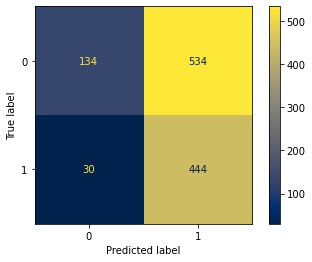

In [197]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(sgdclassifieremb, xval_emb, yval_emb, cmap="cividis")
print(classification_report(yval_emb, ypredemb))

In [172]:
score = sgdclassifier.score(xtrain_embed1, ytrain_embed1)
print("Score: ", score)

ypred1 = sgdclassifier.predict(xval_embed1)


cr = classification_report(yval_embed1, ypred1)
print(cr) 


Score:  0.570081903878844
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       653
           1       0.00      0.00      0.00       489

    accuracy                           0.57      1142
   macro avg       0.29      0.50      0.36      1142
weighted avg       0.33      0.57      0.42      1142



C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

acc_nb_lr= accuracy_score(yval_embed,ypred )
acc_nb_lr

0.5166374781085814

In [123]:
ytrain_embed.shape

(6471,)

In [ ]:
ypred = sgdc.predict(xval_embed)

cm = confusion_matrix(ytrain_embed, yval_embed)
print(cm) 

In [ ]:
cr = classification_report(ytest, ypred)
print(cr)


In [35]:
import spacy

In [24]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator, TransformerMixin

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_core_web_lg"):
        self.model = model

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])

In [25]:
sgdc = SGDClassifier()

In [33]:
y_train = df_train["target"]

In [42]:
import spacy
ner = spacy.load("en_core_web_lg")
## tag text
#txt = df_train['text_cleaned'].iloc[0]
#doc = ner(txt)
## display result
#spacy.displacy.render(doc, style="ent")

In [131]:
texts = df_train["text_cleaned"].values
labels = df_train["target"].values

In [73]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [147]:
max_num_words = 1000
max_seq_length = 27

In [148]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[    0,     0,     0, ...,  2665,  5239,     3],
       [    0,     0,     0, ...,     0,     0,   849],
       [    0,     0,     0, ...,   652,   404,   967],
       ...,
       [    0,     0,     0, ...,     1,  5206,  5207],
       [    0,     0,     0, ...,    40,  2013,    90],
       [    0,     0,     0, ...,     1, 17619, 17620]])

In [75]:
len(word_index) 

17620

In [143]:
embeddings_index = dict()

In [94]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400011 word vectors.


In [95]:
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
embedding_matrix.shape

(17621, 50)

In [144]:
embedding_matrix = np.zeros((len(word_index)+1, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Based on the above simple naive bayes showed better accuracy,but there can be some more additional hyper parameter tuning and better models like bagging and boosting models that can be tried ,Also after the embedding neural networks would have produced better accuracy

Applying final chosen model on test data

In [223]:
X_test_bag=cv.transform(df_test['text_cleaned']).toarray()
X_bow = pd.DataFrame(X_test_bag)
X_features = pd.concat([df_test[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_bow], axis=1)



import time
start_time = time.time()
predictions_nb_bowtest= naive_bayes.predict(X_features)
predictions_nb_bowtest
end = time.time()
pred_time = end - start_time
print(' Predict time: {} secs'.format( round(pred_time, 2)))

 Predict time: 0.77 secs


In [213]:
X_train_bow.shape 

(7613, 17596)

In [220]:
import time
start_time = time.time()

In [214]:
X_test_bag= cv.transform(df_test['text_cleaned']).toarray()